<a href="https://colab.research.google.com/github/shrutin11/Deep-Learning-and-Computer-Vision-Lab/blob/main/9_sift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Image:



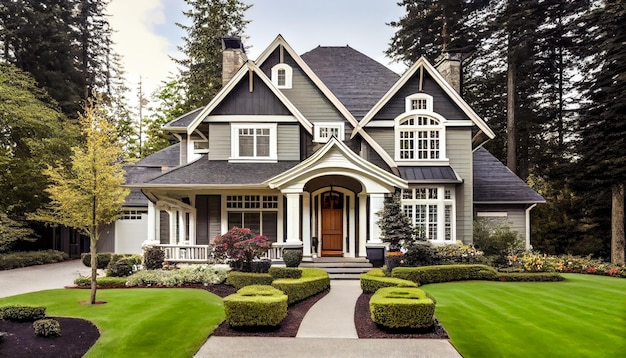

Rotated Image:



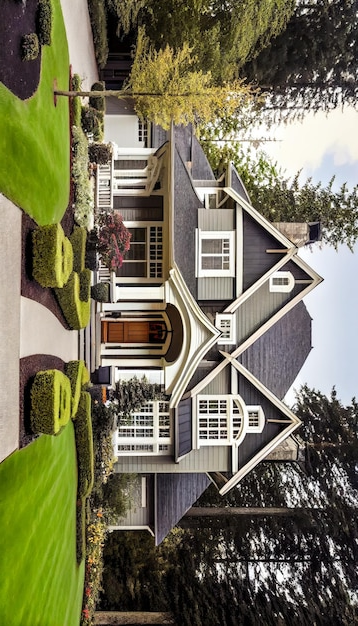

Keypoint 1: (2.4519171714782715, 223.5843963623047), Scale: 1.9391449689865112, Angle: 86.9302749633789
Keypoint 2: (2.4519171714782715, 223.5843963623047), Scale: 1.9391449689865112, Angle: 115.00648498535156
Keypoint 3: (2.5647921562194824, 51.62422180175781), Scale: 1.9304150342941284, Angle: 123.89051818847656
Keypoint 4: (2.8920841217041016, 99.77214813232422), Scale: 1.894144892692566, Angle: 271.4687805175781
Keypoint 5: (3.0723135471343994, 181.95372009277344), Scale: 2.436569929122925, Angle: 235.53662109375
Keypoint 6: (3.835141897201538, 235.17886352539062), Scale: 1.9654686450958252, Angle: 94.61282348632812
Keypoint 7: (4.157071113586426, 60.6463737487793), Scale: 1.9034417867660522, Angle: 114.81980895996094
Keypoint 8: (4.157071113586426, 60.6463737487793), Scale: 1.9034417867660522, Angle: 261.7536315917969
Keypoint 9: (4.270199298858643, 17.986297607421875), Scale: 3.161698579788208, Angle: 138.18115234375
Keypoint 10: (4.8348307609558105, 215.60841369628906), Scale: 2

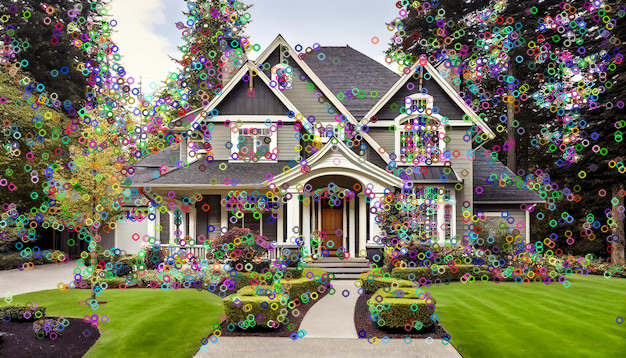

SIFT Keypoints - Rotated:



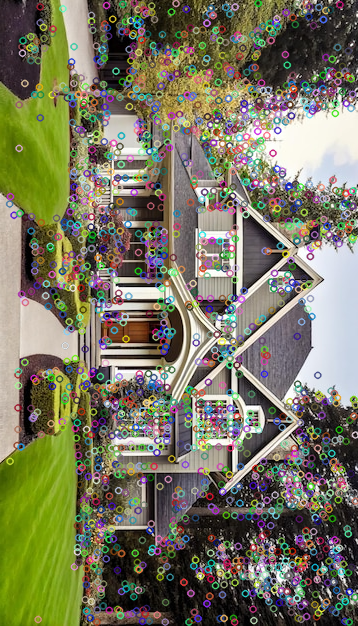

Matches: 2284
Original Image with SIFT Keypoints:



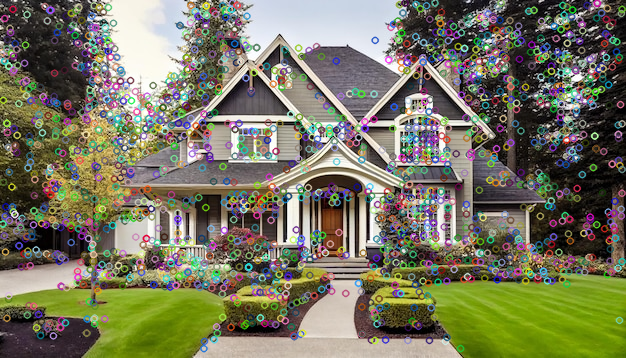

Rotated Image with SIFT Keypoints:



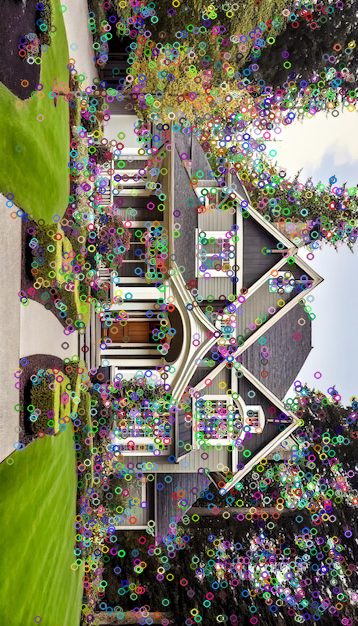

In [10]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def match_sift_features(descriptor1, descriptor2):
    flann = cv2.FlannBasedMatcher({"algorithm": 1, "trees": 5}, {"checks": 50})
    matches = flann.knnMatch(descriptor1, descriptor2, k=2)

    return [m for m, n in matches if m.distance < 0.7 * n.distance]

img_path = '/content/home.jpg'
sift = cv2.SIFT_create()

img = cv2.imread(img_path)
print("Original Image:\n")
cv2_imshow(img)

rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
print("Rotated Image:\n")
cv2_imshow(rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
keypoints, des = sift.detectAndCompute(gray, None)

rotated_gray = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)
rotated_keypoints, rotated_des = sift.detectAndCompute(rotated_gray, None)

for i, keypoint in enumerate(keypoints):
    print(f"Keypoint {i + 1}: ({keypoint.pt[0]}, {keypoint.pt[1]}), Scale: {keypoint.size}, Angle: {keypoint.angle}")

img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)
rotated_img_with_keypoints = cv2.drawKeypoints(rotated_img, rotated_keypoints, None)
print("SIFT Keypoints - Original:\n")
cv2_imshow(img_with_keypoints)
print("SIFT Keypoints - Rotated:\n")
cv2_imshow(rotated_img_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()

matches = match_sift_features(des, rotated_des)
print(f'Matches: {len(matches)}')

img_with_sift = cv2.drawKeypoints(img, keypoints, None)
print("Original Image with SIFT Keypoints:\n")
cv2_imshow(img_with_sift)
cv2.waitKey(0)
cv2.destroyAllWindows()

rotated_img_with_sift = cv2.drawKeypoints(rotated_img, rotated_keypoints, None)
print("Rotated Image with SIFT Keypoints:\n")
cv2_imshow(rotated_img_with_sift)
cv2.waitKey(0)
cv2.destroyAllWindows()
